## Simulation without Event Scheduling

In [1]:
import numpy as np
import pandas as pd
import random

def numofdigits(n):
  return len(str(n).split('.')[1])

lengthAT = int(input("Enter the total number of probabilities for Distribution of Time between Arrival : "))
pAT = []

for i in range(lengthAT):
  ele = float(input("Enter Probability Number "+str(i+1)+" : "))
  pAT.append(ele)

dataAT = [
        [(i+1) for i in range(lengthAT)],
        [i for i in pAT],       
]

lenofunit = numofdigits(dataAT[1][0])

cpAT = [dataAT[1][0]]
for i in range(1,len(dataAT[1])):
  cpAT.append(round((cpAT[i-1]+dataAT[1][i]),lenofunit))

dataAT.append(cpAT)

rdaulAT = [int(i*(10**lenofunit)) for i in dataAT[2]]
rdaulAT[-1] = 0
rdallAT = [i+1 for i in rdaulAT[:-1]]
rdallAT.insert(0,1)

dataAT.append(rdallAT)
dataAT.append(rdaulAT)
dataAT = np.array(dataAT)
dataAT = np.transpose(dataAT)


probtableAT = pd.DataFrame(dataAT, columns = ['Time between arrival','Probability','Cummulative Probability','Lower limit','Upper limit'])
probtableAT = probtableAT.astype({"Time between arrival":"int","Lower limit":"int","Upper limit":"int"})
probtableAT.style.hide_index()


Enter the total number of probabilities for Distribution of Time between Arrival : 8
Enter Probability Number 1 : 0.125
Enter Probability Number 2 : 0.125
Enter Probability Number 3 : 0.125
Enter Probability Number 4 : 0.125
Enter Probability Number 5 : 0.125
Enter Probability Number 6 : 0.125
Enter Probability Number 7 : 0.125
Enter Probability Number 8 : 0.125


Time between arrival,Probability,Cummulative Probability,Lower limit,Upper limit
1,0.125000,0.125000,1,125
2,0.125000,0.250000,126,250
3,0.125000,0.375000,251,375
4,0.125000,0.500000,376,500
5,0.125000,0.625000,501,625
6,0.125000,0.750000,626,750
7,0.125000,0.875000,751,875
8,0.125000,1.000000,876,0


In [2]:
lengthST = int(input("Enter the total number of probabilities for Distribution of Service Time : "))
pST = []

for i in range(lengthST):
  ele = float(input("Enter Probability Number "+str(i+1)+" : "))
  pST.append(ele)

dataST = [
        [(i+1) for i in range(6)],
        [i for i in pST]
]

lenofunit = numofdigits(dataST[1][0])

cpST = [dataST[1][0]]
for i in range(1,len(dataST[1])):
  cpST.append(round((cpST[i-1]+dataST[1][i]),lenofunit))

dataST.append(cpST)
rdaulST = [int(i*(10**lenofunit)) for i in dataST[2]]
rdaulST[-1] = 0
rdallST = [i+1 for i in rdaulST[:-1]]
rdallST.insert(0,1)

dataST.append(rdallST)
dataST.append(rdaulST)
dataST = np.array(dataST)
dataST = np.transpose(dataST)

probtableST = pd.DataFrame(dataST, columns = ['Service Time','Probability','Cummulative Probability','Lower limit','Upper limit'])
probtableST = probtableST.astype({"Service Time":"int","Lower limit":"int","Upper limit":"int"})
probtableST.style.hide_index()

Enter the total number of probabilities for Distribution of Service Time : 6
Enter Probability Number 1 : 0.05
Enter Probability Number 2 : 0.10
Enter Probability Number 3 : 0.20
Enter Probability Number 4 : 0.30
Enter Probability Number 5 : 0.25
Enter Probability Number 6 : 0.10


Service Time,Probability,Cummulative Probability,Lower limit,Upper limit
1,0.050000,0.050000,1,5
2,0.100000,0.150000,6,15
3,0.200000,0.350000,16,35
4,0.300000,0.650000,36,65
5,0.250000,0.900000,66,90
6,0.100000,1.000000,91,0


In [3]:
def assignRD(probtable,digit):
  if digit == 0:
    return len(probtable.loc[:])
  for i in range(len(probtable.loc[:])-1,-1,-1):
    if digit >= probtable['Lower limit'][i]:
      return i+1


In [4]:
# Seed 
random.seed(10)

# No. of Customer
size = int(input("Enter the Total Number of Customers : "))

# Inter Arrival Time 
RD_inter_arrival_time = [random.randrange(0,999) for i in range(size)]
RD_inter_arrival_time[0] = 0


inter_arrival_time = []
for i in RD_inter_arrival_time:
  inter_arrival_time.append(assignRD(probtableAT,i))

inter_arrival_time[0] = 0

# Service Time
RD_service_time = [random.randrange(0,99) for i in range(size)]

service_time = []
for i in RD_service_time:
  service_time.append(assignRD(probtableST,i))

sim_dataset=[
         [(i+1)for i in range(size)],
         [i for i in RD_inter_arrival_time],
         [i for i in inter_arrival_time],
         
]

arrival_time = [sim_dataset[2][0]]
for i in range(1,len(sim_dataset[2])):
  arrival_time.append(round((arrival_time[i-1]+sim_dataset[2][i]),2))

sim_dataset.append(arrival_time)
sim_dataset.append(RD_service_time)
sim_dataset.append(service_time)

Time_Service_Begin = [0 for i in range(size)]
Time_Customer_Waiting_in_Queue = [0 for i in range(size)]
Time_Service_Ends = [0 for i in range(size)]
Time_Customer_Spend_in_System = [0 for i in range(size)]
System_idle = [0 for i in range(size)]

Time_Service_Begin[0] = arrival_time[0]
Time_Service_Ends[0] = service_time[0]
Time_Customer_Spend_in_System[0] = service_time[0]
for i in range(1,size):
  # Time Service Begin 
  Time_Service_Begin[i] = max(arrival_time[i],Time_Service_Ends[i-1])

  # Time customer waiting in queue   
  Time_Customer_Waiting_in_Queue[i] = Time_Service_Begin[i]-arrival_time[i]

  # Time service ends
  Time_Service_Ends[i] = Time_Service_Begin[i] + service_time[i]  

  # Time Customer Spend in the system
  Time_Customer_Spend_in_System[i] = Time_Service_Ends[i] - arrival_time[i]

  # Time when system remains ideal
  if (arrival_time[i]>Time_Service_Ends[i-1]):
    System_idle[i] = arrival_time[i]-Time_Service_Ends[i-1]
  else:
    System_idle[i] = 0 

sim_dataset.append(Time_Service_Begin)
sim_dataset.append(Time_Customer_Waiting_in_Queue)
sim_dataset.append(Time_Service_Ends)
sim_dataset.append(Time_Customer_Spend_in_System)
sim_dataset.append(System_idle)

 
sim_dataset = np.array(sim_dataset)
sim_dataset = np.transpose(sim_dataset)

simtable = pd.DataFrame(sim_dataset, columns = ['Customer Number','Random Digit for Inter-Arrival Time','Inter-Arrival Time','Arrival Time','Random Digit for Service Time','Service Time','Time Service Starts','Time Customer waits in the Queue','Time Service Ends','Total time spent by the customer in the System','System Idle Time'])
simtable.style.hide_index()

Enter the Total Number of Customers : 20


Customer Number,Random Digit for Inter-Arrival Time,Inter-Arrival Time,Arrival Time,Random Digit for Service Time,Service Time,Time Service Starts,Time Customer waits in the Queue,Time Service Ends,Total time spent by the customer in the System,System Idle Time
1,0,0,0,31,3,0,0,3,3,0
2,33,1,1,95,6,3,2,9,8,0
3,439,4,5,46,4,9,4,13,8,0
4,494,4,9,5,1,13,4,14,5,0
5,591,5,14,53,4,14,0,18,4,0
6,15,1,15,17,3,18,3,21,6,0
7,211,2,17,77,5,21,4,26,9,0
8,473,4,21,45,4,26,5,30,9,0
9,832,7,28,48,4,30,2,34,6,0
10,503,5,33,53,4,34,1,38,5,0


In [5]:
# Average waiting time 
Average_waiting_time = sum(Time_Customer_Waiting_in_Queue)/size 

# Probability of customer were waiting
no_customer_who_are_waiting = len(list(filter(lambda x:x>0,Time_Customer_Waiting_in_Queue)))

prob_customer_waiting = no_customer_who_are_waiting / size

# Average service time
Average_service_time = sum(service_time)/size

# Probability of idle server
prob_ideal_server = sum(System_idle) / Time_Service_Ends[size-1]  

# Average time between arrival
Average_Time_Between_Arrival = arrival_time[size-1] / (len(arrival_time) - 1)

# Average waiting time those who wait
average_waiting_time = sum(Time_Customer_Waiting_in_Queue) / no_customer_who_are_waiting

# Average time customer spent in the system 
time_customer_spent = sum(Time_Customer_Spend_in_System)/size

print("\nAverage waiting time : {:.4f}".format(Average_waiting_time))
print("Probability of customer waiting : {:.4f}".format(prob_customer_waiting))
print("Average service time : {:.4f}".format(Average_service_time))
print("Probability of idle server : {:.4f}".format(prob_ideal_server))
print("Average Time Between Arrival : {:.4f}".format(Average_Time_Between_Arrival))
print("Average waiting time of those who wait : {:.4f}".format(average_waiting_time))
print("Average time customer spent in the system : {:.4f}".format(time_customer_spent))


Average waiting time : 2.6000
Probability of customer waiting : 0.7500
Average service time : 3.9000
Probability of idle server : 0.0714
Average Time Between Arrival : 3.8421
Average waiting time of those who wait : 3.4667
Average time customer spent in the system : 6.5000


In [6]:
print("The Probability Distribution Table of Time between Arrival is as followed : ")

lsATul=[]
for i in range(lengthAT):
  lsATul.append('%03d'%probtableAT['Lower limit'][i])

lsATll=[]
for i in range(lengthAT):
  lsATll.append('%03d'%probtableAT['Upper limit'][i])

probtableAT['RD upper'] = lsATul
probtableAT['RD lower'] = lsATll

probtableAT['Random Digit Assignment'] = probtableAT['RD upper']+" - "+probtableAT['RD lower']
probtableAT = probtableAT[["Time between arrival","Probability","Cummulative Probability","Random Digit Assignment"]]
probtableAT.style.hide_index()

The Probability Distribution Table of Time between Arrival is as followed : 


Time between arrival,Probability,Cummulative Probability,Random Digit Assignment
1,0.125000,0.125000,001 - 125
2,0.125000,0.250000,126 - 250
3,0.125000,0.375000,251 - 375
4,0.125000,0.500000,376 - 500
5,0.125000,0.625000,501 - 625
6,0.125000,0.750000,626 - 750
7,0.125000,0.875000,751 - 875
8,0.125000,1.000000,876 - 000


In [7]:
print("The Probability Distribution Table of Service Time is as followed : ")

lsSTul=[]
for i in range(lengthST):
  lsSTul.append('%02d'%probtableST['Lower limit'][i])

lsSTll=[]
for i in range(lengthST):
  lsSTll.append('%02d'%probtableST['Upper limit'][i])

probtableST['RD upper'] = lsSTul
probtableST['RD lower'] = lsSTll

probtableST['Random Digit Assignment'] = probtableST['RD upper']+" - "+probtableST['RD lower']
probtableST = probtableST[["Service Time","Probability","Cummulative Probability","Random Digit Assignment"]]
probtableST.style.hide_index()

The Probability Distribution Table of Service Time is as followed : 


Service Time,Probability,Cummulative Probability,Random Digit Assignment
1,0.050000,0.050000,01 - 05
2,0.100000,0.150000,06 - 15
3,0.200000,0.350000,16 - 35
4,0.300000,0.650000,36 - 65
5,0.250000,0.900000,66 - 90
6,0.100000,1.000000,91 - 00


In [8]:
print("The Simulation Table for "+str(size)+" customers is as followed : ")
simtable.style.hide_index()


The Simulation Table for 20 customers is as followed : 


Customer Number,Random Digit for Inter-Arrival Time,Inter-Arrival Time,Arrival Time,Random Digit for Service Time,Service Time,Time Service Starts,Time Customer waits in the Queue,Time Service Ends,Total time spent by the customer in the System,System Idle Time
1,0,0,0,31,3,0,0,3,3,0
2,33,1,1,95,6,3,2,9,8,0
3,439,4,5,46,4,9,4,13,8,0
4,494,4,9,5,1,13,4,14,5,0
5,591,5,14,53,4,14,0,18,4,0
6,15,1,15,17,3,18,3,21,6,0
7,211,2,17,77,5,21,4,26,9,0
8,473,4,21,45,4,26,5,30,9,0
9,832,7,28,48,4,30,2,34,6,0
10,503,5,33,53,4,34,1,38,5,0


In [9]:
print("\nAverage waiting time : {:.4f}".format(Average_waiting_time))
print("Probability of customer waiting : {:.4f}".format(prob_customer_waiting))
print("Average service time : {:.4f}".format(Average_service_time))
print("Probability of idle server : {:.4f}".format(prob_ideal_server))
print("Average Time Between Arrival : {:.4f}".format(Average_Time_Between_Arrival))
print("Average waiting time of those who wait : {:.4f}".format(average_waiting_time))
print("Average time customer spent in the system : {:.4f}".format(time_customer_spent))


Average waiting time : 2.6000
Probability of customer waiting : 0.7500
Average service time : 3.9000
Probability of idle server : 0.0714
Average Time Between Arrival : 3.8421
Average waiting time of those who wait : 3.4667
Average time customer spent in the system : 6.5000


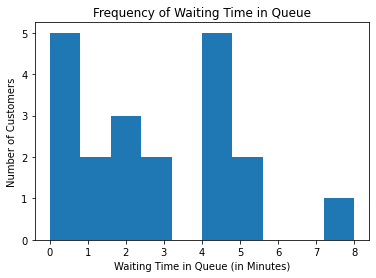

In [10]:
import matplotlib.pyplot as mplt

fig,ax = mplt.subplots(1,1)
ax.hist(Time_Customer_Waiting_in_Queue)

#Setting Title
ax.set_title("Frequency of Waiting Time in Queue")

#Setting axes
ax.set_xlabel("Waiting Time in Queue (in Minutes)")
ax.set_ylabel("Number of Customers")

mplt.show()

## Simulation with Event Scheduling Algorithm

In [11]:
import random
servicetime = []
interarrivaltime = [0]

servicetime_prob = [0.05,0.1,0.2,0.3,0.25,0.1]
servicetime_c_prob = []
interarrival_c_prob = []
c = 0
for i in range(6):
    c = round(c + servicetime_prob[i],2)    
    servicetime_c_prob.append(c)
c = 0
for i in range(8):
  c+= 0.125
  interarrival_c_prob.append(c)
interarrival_rd = [0]
servicetime_rd = []
for i in range(19):
    interarrival_rd.append(random.randint(0,999))
for i in range(20):
    servicetime_rd.append(random.randint(0,99))

rd_min = [1]
rd_max = []
for i in range(6):
  servicetime_c_prob[i] = servicetime_c_prob[i]*100
  rd_max.append(int(servicetime_c_prob[i]))
for i in range(1,6):
  rd_min.append(rd_max[i-1]+1)
rd_min1 = [1]
rd_max1 = []
for i in range(8):
  interarrival_c_prob[i] = interarrival_c_prob[i]*1000
  rd_max1.append(int(interarrival_c_prob[i]))
for i in range(1,8):
  rd_min1.append(rd_max1[i-1]+1)
for i in range(0,20):
    if servicetime_rd[i] == 0:
      servicetime.append(6)
    else:
      for j in range(6):
        if servicetime_rd[i] in range(rd_min[j], rd_max[j]+1):
          servicetime.append(j+1)
for i in range(19):
  if interarrival_rd[i] == 0:
    interarrivaltime.append(8)
  else:
      for j in range(8):
        if interarrival_rd[i] in range(rd_min1[j], rd_max1[j]+1):
          interarrivaltime.append(j+1)      
arrivaltime = [0]
for i in range(1,20):
  arrivaltime.append(arrivaltime[i-1] + interarrivaltime[i])

In [12]:
servicebegins = []
serviceend = []
waitingtime = []
idletime = []
timespent = []
for i in range(20):
  if i==0:
    servicebegins.append(0)
    serviceend.append(servicetime[i])
    waitingtime.append(0)
    idletime.append(0)
    timespent.append(servicetime[i])
  else:
    if arrivaltime[i] >= serviceend[i-1]:
        servicebegins.append(arrivaltime[i])
    else:
        servicebegins.append(serviceend[i-1])
    waitingtime.append(servicebegins[i] - arrivaltime[i])
    serviceend.append(servicebegins[i] + servicetime[i])

    timespent.append(servicetime[i] + waitingtime[i])
    idletime.append(servicebegins[i] - serviceend[i-1])

import pandas as pd
table = pd.DataFrame()
table['RD Inter-Arrival'] = interarrival_rd
table['Inter-Arrival Time'] = interarrivaltime
table['Arrival Time'] = arrivaltime
table['RD Service Time'] = servicetime_rd
table['Service Time'] = servicetime
table['Service Time Begins'] = servicebegins
table['Service Time Ends'] = serviceend
table['Waiting Time'] =  waitingtime
table['Time Spent'] =  timespent
table['Idle Time'] =  idletime

times = list()
for i in range(len(table)):
  times.append(['A', table.iloc[i]['Arrival Time']])
  times.append(['D', table.iloc[i]['Service Time Ends']])

times = sorted(times, key = lambda x: x[1])

es_table = pd.DataFrame()
clock = list()
event_type = list()
for i in range(len(times)):
  clock.append(times[i][1])
  event_type.append(times[i][0])

es_table['Clock'] = clock
es_table['Event Type'] = event_type
lq_t = [0]
ls_t = [1]
busy_time = [0]
max_q_length = [0]
fel = list()

In [13]:
def get_next_arrival(curr_time_idx):
  for i in range(curr_time_idx + 1, len(es_table)):
    if es_table.iloc[i]['Event Type'] == 'A':
      return es_table.iloc[i]['Clock']
  
  return -1


def get_next_departure(curr_time_idx):
  for i in range(curr_time_idx + 1, len(es_table)):
    if es_table.iloc[i]['Event Type'] == 'D':
      return es_table.iloc[i]['Clock']
  
  return -1

In [14]:
fel.append([
    ['A', get_next_arrival(0)],
    ['D', get_next_departure(0)],
])

for i in range(1, len(times)):
  if event_type[i] == 'A':
    if ls_t[i - 1] == 1:
      lq_t.append(lq_t[i - 1] + 1)
      ls_t.append(ls_t[i - 1])
    else:
      ls_t.append(1)
      lq_t.append(lq_t[i - 1])
  else:
    if lq_t[i - 1] > 0:
      lq_t.append(lq_t[i - 1] - 1)
      ls_t.append(ls_t[i - 1])
    else:
      ls_t.append(0)
      lq_t.append(lq_t[i - 1])
    
  if ls_t[i - 1] == 1:
    busy_time.append(
        busy_time[i - 1] 
        + es_table.iloc[i]['Clock'] 
        - es_table.iloc[i - 1]['Clock']
    )
  else:
    busy_time.append(busy_time[i - 1])
  
  next_arrival = get_next_arrival(i)
  next_departure = get_next_departure(i)
  
  if next_arrival == -1 and next_departure == -1:
    fel.append([])
  elif next_arrival == -1:
    fel.append([
        ['D', next_departure]
    ])
  elif next_departure == -1:
    fel.append([
        ['A', next_arrival]
    ])
  else:
    fel.append([
        ['A', next_arrival],
        ['D', next_departure],
    ])
    
  max_q_length.append(max(max_q_length[i - 1], lq_t[i]))

In [15]:
es_table['LQ(t)'] = lq_t
es_table['LS(t)'] = ls_t
es_table['FEL'] = fel
es_table['Server Busy Time'] = busy_time
es_table['Maximum Queue Length'] = max_q_length

In [16]:
print("The Simulation Table by using Time Scheduling Algorithm is as followed:")
es_table.style.hide_index()

The Simulation Table by using Time Scheduling Algorithm is as followed:


Clock,Event Type,LQ(t),LS(t),FEL,Server Busy Time,Maximum Queue Length
0,A,0,1,"[['A', 8], ['D', 6]]",0,0
6,D,0,0,"[['A', 8], ['D', 11]]",6,0
8,A,0,1,"[['A', 12], ['D', 11]]",6,0
11,D,0,0,"[['A', 12], ['D', 16]]",9,0
12,A,0,1,"[['A', 19], ['D', 16]]",9,0
16,D,0,0,"[['A', 19], ['D', 24]]",13,0
19,A,0,1,"[['A', 27], ['D', 24]]",13,0
24,D,0,0,"[['A', 27], ['D', 32]]",18,0
27,A,0,1,"[['A', 29], ['D', 32]]",18,0
29,A,1,1,"[['A', 37], ['D', 32]]",20,1
